In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [4]:
ski_data = pd.read_csv('C:/Users/Mohammad/DataScienceCapstone/data/Airbnb_cleaned.csv')

In [5]:
#Code task 2#
#Call the info method on ski_data to see a summary of the data
ski_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2082 entries, 0 to 2081
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              2082 non-null   int64  
 1   name                            2082 non-null   object 
 2   host_id                         2082 non-null   int64  
 3   host_name                       2082 non-null   object 
 4   neighbourhood                   2082 non-null   int64  
 5   latitude                        2082 non-null   float64
 6   longitude                       2082 non-null   float64
 7   room_type                       2082 non-null   object 
 8   price                           2082 non-null   int64  
 9   minimum_nights                  2082 non-null   int64  
 10  number_of_reviews               2082 non-null   int64  
 11  last_review                     2082 non-null   object 
 12  reviews_per_month               20

In [4]:

ski_data1=ski_data[['neighbourhood', 'minimum_nights', 'latitude', 'longitude',  'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'price']]
ski_data1.head()

,neighbourhood,minimum_nights,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,price
0,28801,30,35.60670,-82.55563,30,89,0.79,82
1,28806,1,35.57864,-82.59578,1,279,2.44,90
2,28806,1,35.57864,-82.59578,1,290,2.78,30
3,28801,30,35.61442,-82.54127,30,58,0.51,125
4,28804,30,35.61856,-82.55276,30,56,0.50,134


In [5]:
#Code task 1#
#Create a new dataframe, `state_summary_scale` from `state_summary` whilst setting the index to 'state'
state_summary_scale = ski_data1.set_index('neighbourhood')
#Save the state labels (using the index attribute of `state_summary_scale`) into the variable 'state_summary_index'
state_summary_index = state_summary_scale.index
state_summary_index

#Save the column names (using the `columns` attribute) of `state_summary_scale` into the variable 'state_summary_columns'
state_summary_columns = state_summary_scale.columns
state_summary_scale.head()

,minimum_nights,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,price
neighbourhood,,,,,,,
28801,30,35.60670,-82.55563,30,89,0.79,82
28806,1,35.57864,-82.59578,1,279,2.44,90
28806,1,35.57864,-82.59578,1,290,2.78,30
28801,30,35.61442,-82.54127,30,58,0.51,125
28804,30,35.61856,-82.55276,30,56,0.50,134


In [6]:
state_summary_scale = scale(state_summary_scale)

In [7]:
#Code task 2#
#Create a new dataframe from `state_summary_scale` using the column names we saved in `state_summary_columns`
state_summary_scaled_df = pd.DataFrame(state_summary_scale, columns=state_summary_columns)
state_summary_scaled_df.head()

,minimum_nights,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,price
0,2.610197,0.611466,0.026727,2.610197,0.025421,-0.933398,-0.568420
1,-0.361229,0.018845,-0.838365,-0.361229,1.868222,-0.212178,-0.511128
2,-0.361229,0.018845,-0.838365,-0.361229,1.974911,-0.063563,-0.940815
3,2.610197,0.774511,0.336135,2.610197,-0.275246,-1.055787,-0.260478
4,2.610197,0.861947,0.088565,2.610197,-0.294644,-1.060158,-0.196025


In [8]:
#Code task 3#
#Call `state_summary_scaled_df`'s `mean()` method
state_summary_scaled_df.mean()

minimum_nights       3.722073e-17
latitude             7.704089e-14
longitude           -3.060453e-13
minimum_nights       3.722073e-17
number_of_reviews   -6.736526e-16
reviews_per_month    2.447610e-17
price               -5.439133e-17
dtype: float64

In [9]:
#Code task 4#
#Call `state_summary_scaled_df`'s `std()` method
state_summary_scaled_df.std()

minimum_nights       1.00024
latitude             1.00024
longitude            1.00024
minimum_nights       1.00024
number_of_reviews    1.00024
reviews_per_month    1.00024
price                1.00024
dtype: float64

In [10]:
#Code task 5#
#Repeat the previous call to `std()` but pass in ddof=0 
state_summary_scaled_df.std(ddof=0)

minimum_nights       1.0
latitude             1.0
longitude            1.0
minimum_nights       1.0
number_of_reviews    1.0
reviews_per_month    1.0
price                1.0
dtype: float64

In [11]:
state_pca = PCA().fit(state_summary_scale)

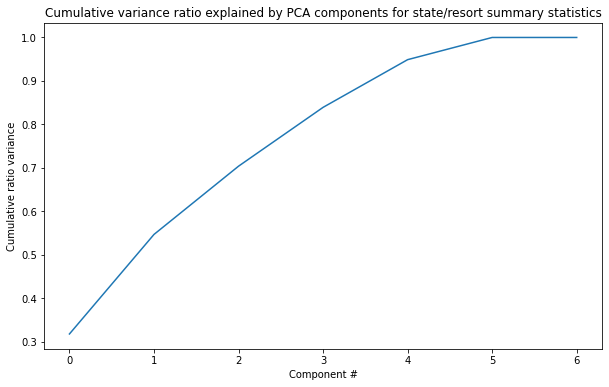

In [12]:
#Code task 6#
#Call the `cumsum()` method on the 'explained_variance_ratio_' attribute of `state_pca` and
#create a line plot to visualize the cumulative explained variance ratio with number of components
#Set the xlabel to 'Component #', the ylabel to 'Cumulative ratio variance', and the
#title to 'Cumulative variance ratio explained by PCA components for state/resort summary statistics'
#Hint: remember the handy ';' at the end of the last plot call to suppress that untidy output
plt.subplots(figsize=(10, 6))
plt.plot(state_pca.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA components for state/resort summary statistics');

In [13]:
#Code task 7#
#Call `state_pca`'s `transform()` method, passing in `state_summary_scale` as its argument
state_pca_x = state_pca.transform(state_summary_scale)

In [14]:
state_pca_x.shape
state_pca_x

array([[ 3.54186006e+00,  1.56651240e+00,  2.58024084e-02, ...,
        -1.18387815e-01,  3.26787711e-01, -2.47306615e-17],
       [-9.66663732e-01,  1.06973783e+00, -3.53607874e-01, ...,
         2.80436660e-01,  1.54944244e+00, -9.11650384e-18],
       [-1.07083883e+00,  1.39664330e+00, -3.14994513e-01, ...,
         4.18362325e-02,  1.52426389e+00, -7.29131299e-18],
       ...,
       [-1.76398948e-01, -5.02677017e-01, -2.73389670e-01, ...,
        -8.01954574e-01, -5.69016628e-01,  6.72109734e-19],
       [-5.88438975e-01,  2.92957941e-01, -1.07194936e+00, ...,
        -2.04443153e-01, -1.06287703e+00,  2.02411428e-17],
       [ 1.28959084e-01, -1.38190997e+00, -1.09531143e+00, ...,
         1.10131768e+00,  2.26478863e-01, -1.58809753e-17]])

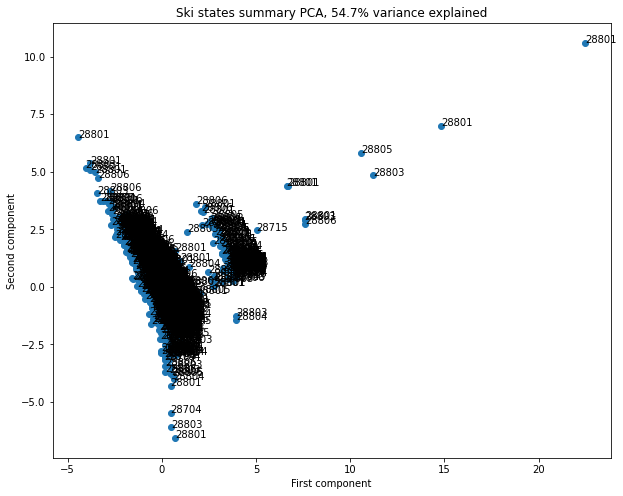

In [15]:
x = state_pca_x[:, 0]
y = state_pca_x[:, 1]
state = state_summary_index
pc_var = 100 * state_pca.explained_variance_ratio_.cumsum()[1]
plt.subplots(figsize=(10,8))
plt.scatter(x=x, y=y)
plt.xlabel('First component')
plt.ylabel('Second component')
plt.title(f'Ski states summary PCA, {pc_var:.1f}% variance explained')
for s, x, y in zip(state, x, y):
    plt.annotate(s, (x, y))

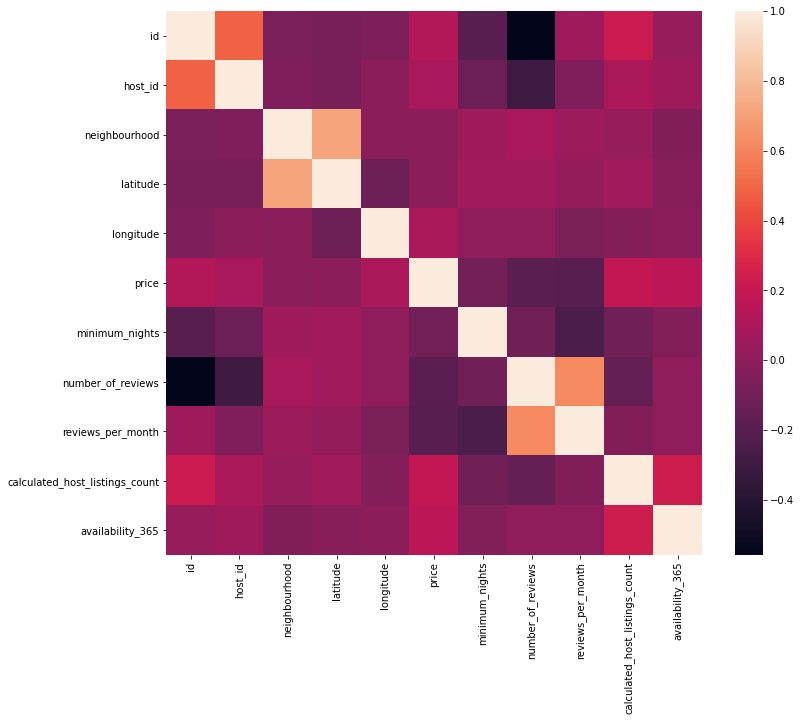

In [16]:
plt.subplots(figsize=(12,10))
sns.heatmap(ski_data.corr());

In [17]:
def scatterplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'price', data=ski_data, alpha=0.5)
        ax.set(xlabel=col, ylabel='Ticket price')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

In [27]:
features = [ item for item in ski_data.columns if item not in ['price', 'name','host_name','last_review']]

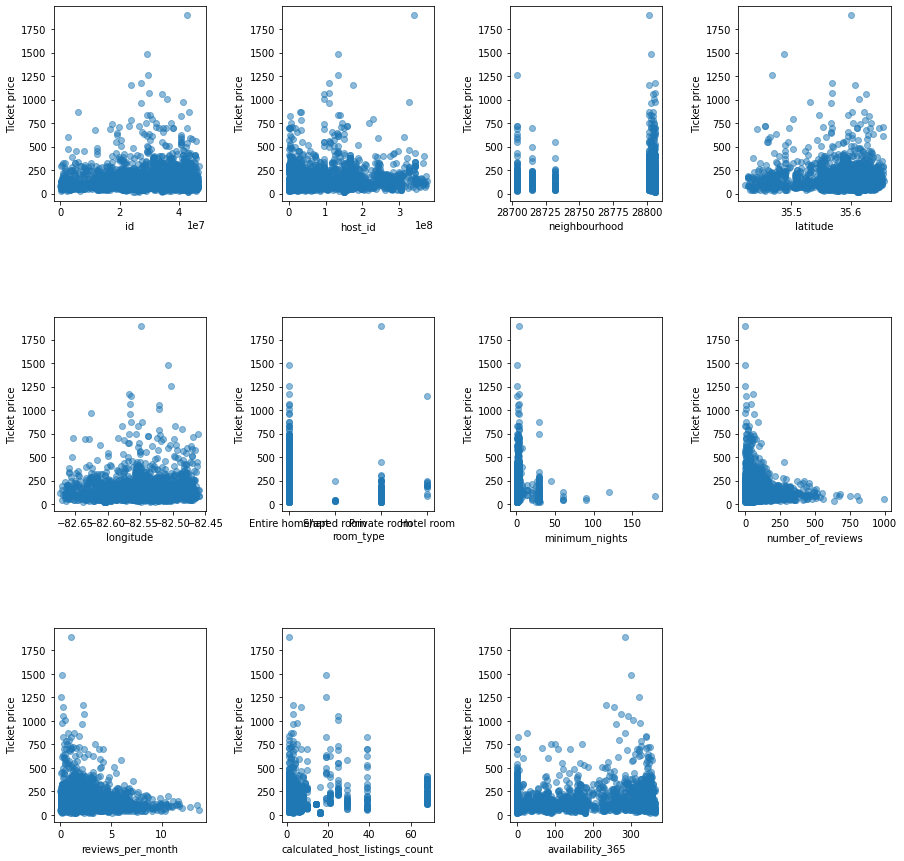

In [28]:
scatterplots(features, ncol=4, figsize=(15, 15))

In [29]:
datapath = 'C:/Users/Mohammad/DataScienceCapstone/data'
datapath_skidata = os.path.join(datapath, 'Airbnb_step3_features.csv')
if not os.path.exists(datapath_skidata):
    ski_data.to_csv(datapath_skidata, index=False)